In [1]:
import pandas as pd
import os
import glob
import os 
import numpy as np

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import hermione as hm



# Editable text and proper LaTeX fonts in illustrator
matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True

# Editable fonts. 42 is the magic number
matplotlib.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
matplotlib.rcParams['mathtext.fontset'] = 'cm'
%matplotlib inline

sns.set(style='whitegrid', context='paper')


data_ingest_folder = os.path.join('..', '00_data_ingest' )
folder = os.path.join(data_ingest_folder, '13_ngenes_ncells_facs')

palette_folder = os.path.join(data_ingest_folder, '15_color_palette')
colors = pd.read_csv(os.path.join(palette_folder, 'tissue_colors.csv'), index_col=0, squeeze=True)
colors

Aorta                #1f77b4
Bladder              #aec7e8
Brain_Myeloid        #ff7f0e
Brain_Non-Myeloid    #ffbb78
Large_Intestine      #2ca02c
Diaphragm            #98df8a
Fat                  #d62728
Heart                #ff9896
Heart_and_Aorta      #ff9896
Kidney               #9467bd
Liver                #c5b0d5
Lung                 #8c564b
Mammary_Gland        #c49c94
Marrow               #e377c2
Limb_Muscle          #f7b6d2
Pancreas             #7f7f7f
Skin                 #c7c7c7
Spleen               #bcbd22
Thymus               #dbdb8d
Tongue               #17becf
Trachea              #9edae5
Name: color, dtype: object

In [2]:
globber = os.path.join(folder, '*_nreads_ngenes.csv')

dfs = []

for filename in glob.iglob(globber):
    df = pd.read_csv(filename, index_col=0)
    df['tissue'] = os.path.basename(filename).split('_nreads_ngenes.csv')[0]
    dfs.append(df)
nreads_ngenes = pd.concat(dfs)

print(nreads_ngenes.shape)
print(len(nreads_ngenes.groupby('tissue')))
nreads_ngenes.head()

(44949, 4)
20


,nGene,nReads,orig.ident,tissue
A1.MAA000907.3_11_M.1.1,1492,59288,Liver,Liver
A1.MAA100039.3_11_M.1.1,8885,1369546,Liver,Liver
A1.MAA100138.3_56_F.1.1,7168,1838345,Liver,Liver
A1.MAA100140.3_57_F.1.1,6938,1664289,Liver,Liver
A10.MAA000907.3_11_M.1.1,2279,306456,Liver,Liver


In [3]:
nreads_ngenes['log10 nReads'] = np.log10(nreads_ngenes['nReads'])
nreads_ngenes.head()

,nGene,nReads,orig.ident,tissue,log10 nReads
A1.MAA000907.3_11_M.1.1,1492,59288,Liver,Liver,4.772967
A1.MAA100039.3_11_M.1.1,8885,1369546,Liver,Liver,6.136577
A1.MAA100138.3_56_F.1.1,7168,1838345,Liver,Liver,6.264427
A1.MAA100140.3_57_F.1.1,6938,1664289,Liver,Liver,6.221229
A10.MAA000907.3_11_M.1.1,2279,306456,Liver,Liver,5.486368


In [4]:
# Replace underscores with spaces for LaTeX happiness
nreads_ngenes['tissue'] = nreads_ngenes['tissue'].str.replace('_', ' ')
colors.index = colors.index.str.replace('_', ' ')

In [5]:
tissues = sorted(nreads_ngenes['tissue'].unique())
tissues

['Aorta',
 'Bladder',
 'Brain Myeloid',
 'Brain Non-Myeloid',
 'Diaphragm',
 'Fat',
 'Heart',
 'Kidney',
 'Large Intestine',
 'Limb Muscle',
 'Liver',
 'Lung',
 'Mammary Gland',
 'Marrow',
 'Pancreas',
 'Skin',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea']

In [6]:
kwargs = dict(data=nreads_ngenes, row='tissue', facet_kws=dict(sharex=True),
               row_order=tissues, palette=colors, xlabel_suffix='')

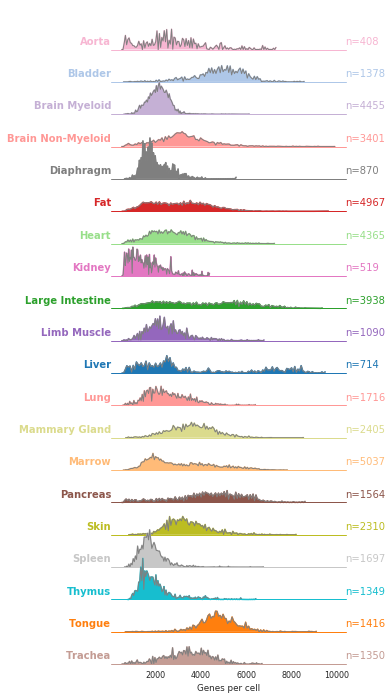

In [7]:
g = hm.horizonplot(x='nGene', **kwargs)
g.set_xlabels('Genes per cell')

for ax in g.axes.flatten():
#     # Add white gridlines
#     xticks = ax.get_xticks()
#     xmin, xmax, ymin, ymax = ax.axis()
#     ax.vlines(xticks, ymin, 1.2*ymax, color='white', clip_on=False, linewidth=1)
#     ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    # Remove ticklabels except for last row
    if not ax.is_last_row():
        plt.setp(ax.get_xticklabels(), visible=False)

g.savefig('figure1e_horizonplot_genes_per_cell.pdf')